In [1]:
import numpy as np
from generator.change_point_generator import ChangePointGenerator
from drift.cusum import CUSUM_Detector, ProbCUSUM_Detector

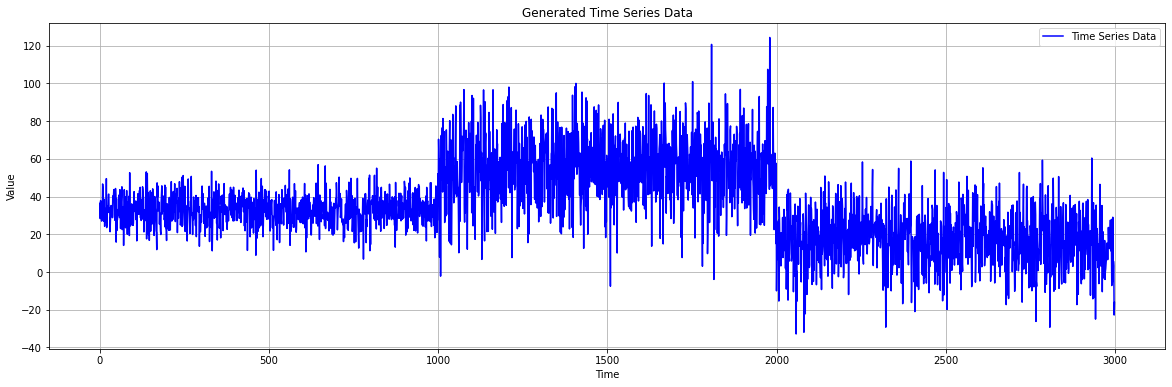

In [5]:
# Generate time series data with change points
generator = ChangePointGenerator(num_segments=3, segment_length=1000, change_point_type='sudden_shift')
generator.generate_data()

# Plot the generated data
generator.plot_data()

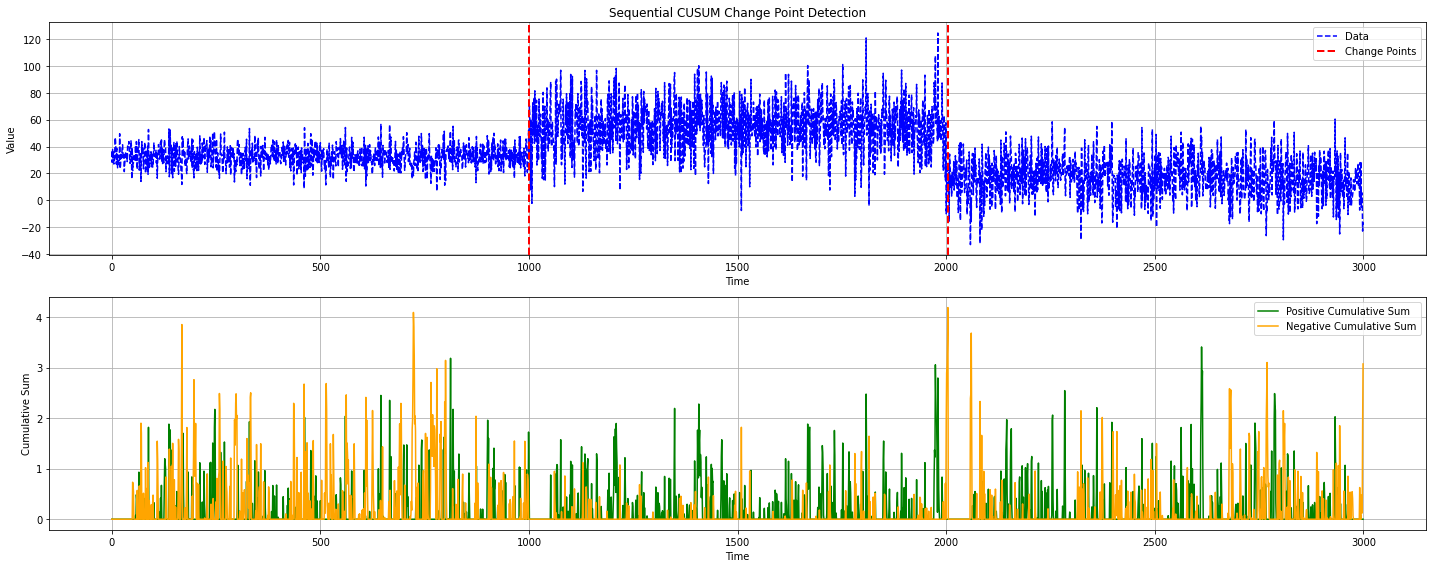

In [9]:
# Detect change points using CUSUM Detector
cusum_detector = CUSUM_Detector(warmup_period=50, delta=1, threshold=5)
cusum_pos_changes, cusum_neg_changes, cusum_change_points = cusum_detector.detect_change_points(np.array(generator.data))

# Plot the detected change points using CUSUM Detector
cusum_detector.plot_change_points(generator.data, cusum_change_points, cusum_pos_changes, cusum_neg_changes)

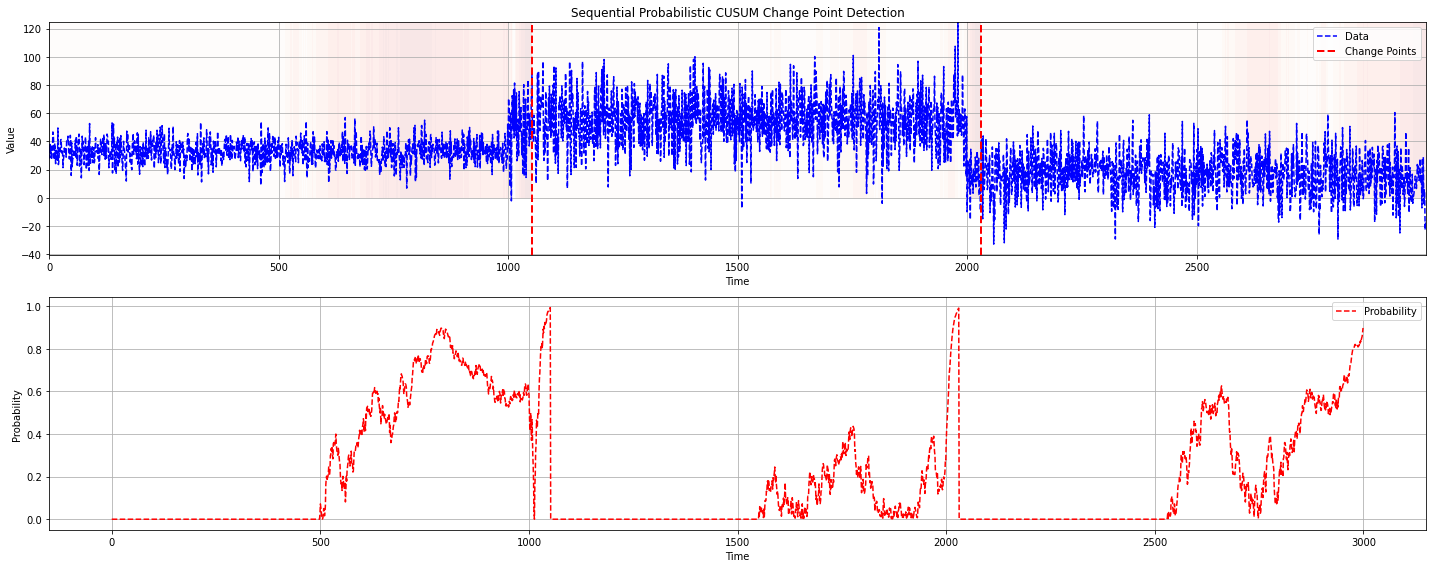

In [17]:
# Detect change points using Probabilistic CUSUM Detector
prob_detector = ProbCUSUM_Detector(warmup_period=500, threshold_probability=0.01)
prob_probabilities, prob_change_points = prob_detector.detect_change_points(np.array(generator.data))

# Plot the detected change points using Probabilistic CUSUM Detector
prob_detector.plot_change_points(generator.data, prob_change_points, prob_probabilities)